In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df= pd.read_csv("Feature_Engineering_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,new_customer,High_pay_customer,charges_per_tenure,Customer_Engagement,is_electronic_check
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,...,Electronic check,29.85,29.85,0,0-12,1,0,29.850000,1,1
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,1,...,Mailed check,56.95,1889.50,0,25-36,0,0,55.573529,2,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,1,...,Mailed check,53.85,108.15,1,0-12,1,0,54.075000,2,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,1,...,Bank transfer (automatic),42.30,1840.75,0,37-48,0,0,40.905556,3,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,0,...,Electronic check,70.70,151.65,1,0-12,1,1,75.825000,0,1


In [4]:
df.drop(["customerID","tenure_group"],axis=1,inplace=True)

In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'new_customer',
       'High_pay_customer', 'charges_per_tenure', 'Customer_Engagement',
       'is_electronic_check'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7043 non-null   int64  
 1   SeniorCitizen        7043 non-null   int64  
 2   Partner              7043 non-null   int64  
 3   Dependents           7043 non-null   int64  
 4   tenure               7043 non-null   int64  
 5   PhoneService         7043 non-null   int64  
 6   MultipleLines        7043 non-null   object 
 7   InternetService      7043 non-null   object 
 8   OnlineSecurity       7043 non-null   int64  
 9   OnlineBackup         7043 non-null   int64  
 10  DeviceProtection     7043 non-null   int64  
 11  TechSupport          7043 non-null   int64  
 12  StreamingTV          7043 non-null   int64  
 13  StreamingMovies      7043 non-null   int64  
 14  Contract             7043 non-null   object 
 15  PaperlessBilling     7043 non-null   i

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'new_customer',
       'High_pay_customer', 'charges_per_tenure', 'Customer_Engagement',
       'is_electronic_check'],
      dtype='object')

In [8]:
from sklearn.preprocessing import OneHotEncoder
cat_col=["MultipleLines","InternetService","Contract","PaymentMethod"]
df_encoded = pd.get_dummies(df,columns=cat_col,drop_first=True)

Categorical Encoding: One-Hot Encoding
This block prepares categorical variables for machine learning by converting them into a numerical format using One-Hot Encoding.

Target Columns: Specifically targets MultipleLines, InternetService, Contract, and PaymentMethod.

Method: Utilizes pd.get_dummies() to create separate binary columns (dummy variables) for each unique category within these features.

Optimization: The parameter drop_first=True is used to avoid the Dummy Variable Trap (multi-collinearity) by removing one redundant column for each feature.

Purpose: Since most machine learning algorithms cannot process text labels directly, this transformation turns categorical relationships into a mathematical format the model can understand.

In [9]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   int64  
 7   OnlineBackup                           7043 non-null   int64  
 8   DeviceProtection                       7043 non-null   int64  
 9   TechSupport                            7043 non-null   int64  
 10  StreamingTV                            7043 non-null   int64  
 11  Stre

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'new_customer',
       'High_pay_customer', 'charges_per_tenure', 'Customer_Engagement',
       'is_electronic_check'],
      dtype='object')

In [11]:
df_encoded.drop(['OnlineSecurity', 
               'OnlineBackup',
               'DeviceProtection',
               'TechSupport',
               'StreamingTV',
               'StreamingMovies','TotalCharges'],axis=1,inplace=True)

Feature Selection: Dropping Redundant Columns
This code performs manual feature selection by removing specific columns from the df_encoded DataFrame that are no longer needed for the model.

Columns Removed: * Individual service indicators (OnlineSecurity, OnlineBackup, etc.) which have likely been aggregated into the Customer_Engagement score.

TotalCharges, potentially to avoid multicollinearity with MonthlyCharges or because it contains missing values.

Execution: * axis=1: Specifies that columns (not rows) are being dropped.

inplace=True: Modifies the existing DataFrame directly without creating a new copy, which saves memory.

Goal: Streamline the dataset to focus only on the most predictive features and reduce dimensionality.

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   new_customer                           7043 non-null   int64  
 10  High_pay_customer                      7043 non-null   int64  
 11  char

In [13]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,new_customer,...,is_electronic_check,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,1,...,1,True,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,0,0,...,0,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,1,1,...,0,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,0,0,...,0,True,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,1,1,...,1,False,False,True,False,False,False,False,True,False


In [14]:
bool_col = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_col] = df_encoded[bool_col].astype('int')

Data Type Conversion: Boolean to Integer
This code block ensures that all logical (Boolean) features are converted into a numerical format suitable for machine learning models.

Logic: It automatically identifies all columns in the df_encoded DataFrame that contain True/False values.

Transformation: Converts those specific columns into integers, where:

True becomes 1.

False becomes 0.

Purpose: This step is crucial for ensuring compatibility with algorithms (such as Logistic Regression) that require strictly numerical input rather than logical types.

In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   new_customer                           7043 non-null   int64  
 10  High_pay_customer                      7043 non-null   int64  
 11  char

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score


Model Preparation: Importing Algorithms and Evaluation Metrics
This block imports the necessary tools from the Scikit-Learn library to build, train, and evaluate multiple machine learning models.

Algorithms: Loads a diverse suite of classifiers to compare performance:

Linear: LogisticRegression

Tree-Based: DecisionTreeClassifier

Ensemble (Bagging/Boosting): RandomForest, AdaBoost, and GradientBoosting.

Model Selection: Imports train_test_split to divide the dataset into training sets (for model learning) and testing sets (for unbiased evaluation).

Evaluation Metrics: Includes accuracy_score, recall_score, and precision_score to measure how well the models predict classes, particularly focusing on the balance between finding all positive cases and being accurate with those findings.

In [17]:
X = df_encoded.drop(columns='Churn')
y = df_encoded["Churn"]

X (Feature Matrix): Contains all columns from the dataset except for the Churn label. These are the variables the models will use to learn patterns.

y (Target Vector): Contains only the Churn column, representing the outcome we are trying to predict (whether a customer left or stayed).

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

Training Set ($75\%$): Used to teach the models the relationship between customer features and churn.Testing Set ($25\%$): Used as a "hold-out" set to validate model performance and check for overfitting.

In [19]:
!pip install xgboost

In [20]:
from xgboost import XGBClassifier
models={
    'Logistic regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Gradient Boost':GradientBoostingClassifier(),
    'XGBoostClassifier':XGBClassifier()
}
results=[]
for name,model in models.items():
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    results.append({
        "Model":name,
        "Train Accuracy":accuracy_score(y_train,y_train_pred),
        "Test Accuracy":accuracy_score(y_test,y_test_pred),
        "Train Recall": recall_score(y_train,y_train_pred),
        "Test Recall": recall_score(y_test,y_test_pred),
        
    })
result_df=pd.DataFrame(results)
result_df

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall
0,Logistic regression,0.801401,0.803521,0.501439,0.524008
1,Random Forest,0.998485,0.787621,0.996403,0.482255
2,AdaBoost,0.801590,0.798410,0.494964,0.494781
3,Decision Tree,0.998485,0.720613,0.995683,0.465553
4,Gradient Boost,0.821848,0.804656,0.543885,0.521921
5,XGBoostClassifier,0.929004,0.790460,0.812230,0.521921


Model Training and Competitive Benchmarking
This block automates the process of training multiple machine learning algorithms and comparing their performance metrics.

Model Selection: Initializes a dictionary containing six different algorithms, ranging from simple linear models (Logistic Regression) to complex ensembles (Random Forest, AdaBoost, Gradient Boost, and XGBoost).

Automated Pipeline: * Iterates through each model, fitting it to the training data (X_train, y_train).

Generates predictions for both the Training set (to check for overfitting) and the Testing set (to evaluate generalization).

Metric Collection: Captures Accuracy and Recall for both sets.

Note: Recall is particularly important in churn prediction, as it measures the model's ability to identify all customers who are actually leaving.

Consolidation: Aggregates all results into a structured pandas DataFrame for easy comparison and ranking.

In [21]:
logistic_param = {
        "solver": ["liblinear"],
        "penalty": ["l1", "l2"],
        "C": [0.01, 0.1, 1, 10],
        "max_iter": [300, 500]
}
grad_boost_param = {
    'loss':['log_loss', 'exponential'],
    'learning_rate':[0.05,0.1],
    'n_estimators':[100,200,500],
    
    'min_samples_split':[2,6,8,10],
    'min_samples_leaf':[1,3,5],
    'max_depth':[5,10,None,8]
}
XGB_param = {
    'max_depth':[5,8,None,10],
    'n_estimators':[100,200,500,800],
    'learning_rate':[0.1,0.01],
    'colsample_bytree':[0.5,0.8,0.4,1],
    'subsample': [0.7, 0.9, 1.0]
}

Hyperparameter Grid Definition
This code block defines the search space (grids) for fine-tuning the top-performing models. Hyperparameter tuning is essential for optimizing model performance and preventing overfitting.

Logistic Regression (logistic_param): Focuses on regularization strength (C) and types (L1/L2) to prevent the model from becoming too complex.

Gradient Boosting (grad_boost_param): Tunes the "learning" process by adjusting the number of trees (n_estimators), how fast it learns (learning_rate), and the complexity of individual trees (max_depth, min_samples_split).

XGBoost (XGB_param): Targets high-performance parameters including colsample_bytree and subsample to introduce randomness and improve generalization, alongside standard depth and estimator counts.

In [22]:
randomcv_model = [('logistic',LogisticRegression(),logistic_param),('Gradint',GradientBoostingClassifier(),grad_boost_param),
                 ('XGB',XGBClassifier(),XGB_param)
                 ]

Model Selection: Focuses on three diverse algorithms: Logistic Regression (Linear), Gradient Boosting (Ensemble), and XGBoost (Advanced Boosting).

Data Structure: Uses a list of tuples containing:

A Label (string name) for the model.

The Model Instance (the estimator).

The Parameter Dictionary (the search space defined in the previous step).

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:

model_param={}
for name,model,params in randomcv_model:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,verbose=2,cv=3,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_
for model_name in model_param:
    print("Best param",model_name),
    print(model_param[model_name])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best param logistic
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'C': 1}
Best param Gradint
{'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 5, 'loss': 'exponential', 'learning_rate': 0.05}
Best param XGB
{'subsample': 1.0, 'n_estimators': 500, 'max_depth': None, 'learning_rate': 0.01, 'colsample_bytree': 0.5}


Automated Hyperparameter Optimization via Randomized Search
This block executes the tuning process to find the most effective settings for the selected models using RandomizedSearchCV.

The Process: It iterates through the previously defined list of models and their respective parameter grids.

Search Strategy: * n_iter=100: Randomly samples 100 different combinations from the parameter grid to find the best fit efficiently.

cv=3: Uses 3-fold cross-validation to ensure the model performs consistently across different subsets of the training data.

n_jobs=-1: Utilizes all available CPU cores to speed up the computation.

Output: It stores and prints the best_params_ for each model, identifying the specific configuration that resulted in the highest validation score.

In [25]:
models={
    'Logistic Reg':LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 300, C= 1),
    'Gradient ':GradientBoostingClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 1, max_depth= 5, loss= 'log_loss', learning_rate= 0.05),
    'XGB':XGBClassifier(n_estimators= 500, max_depth= 5, learning_rate= 0.01, colsample_bytree= 0.8,subsample=1.0)
}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Recall": recall_score(y_train, y_train_pred, pos_label=1),
        "Test Recall": recall_score(y_test, y_test_pred, pos_label=1)
    })
result_df = pd.DataFrame(results)
result_df
    

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall
0,Logistic Reg,0.804241,0.805224,0.502878,0.521921
1,Gradient,0.845134,0.798410,0.590647,0.498956
2,XGB,0.822984,0.812039,0.538849,0.521921


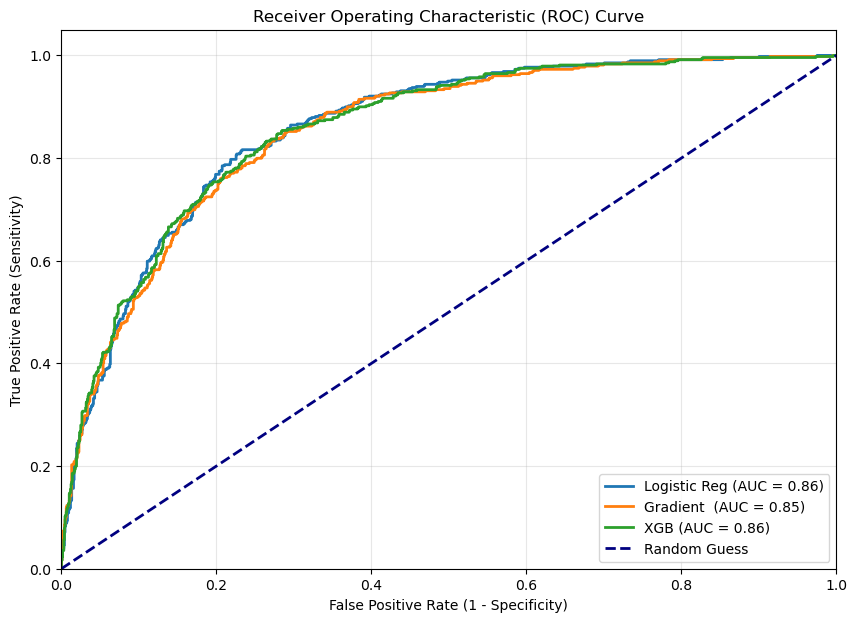

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Model Evaluation: ROC Curve & AUC AnalysisThis code block visualizes the diagnostic ability of the optimized models by plotting the Receiver Operating Characteristic (ROC) curve.Logic: It calculates the True Positive Rate (Sensitivity) against the False Positive Rate (1-Specificity) at various threshold settings.Key Metric: AUC (Area Under the Curve):Quantifies the overall ability of the model to discriminate between "Churn" and "No Churn" cases.$AUC = 1.0$: Perfect model.$AUC = 0.5$: Random guessing (represented by the dashed diagonal line).Purpose: By comparing the curves, we can visually identify which model (Logistic Regression, Gradient Boosting, or XGBoost) provides the best separation between classes, helping us select the most robust model for deployment.

## Final Model Selection & Business Outcome

After evaluating multiple models using recall and ROC-AUC as primary metrics due to class imbalance, XGBoost and Logistic Regression emerged as the top performers.

XGBoost was selected as the final model because:
- It achieved the highest test accuracy
- It matched the best churn recall among all models
- It showed good generalization with minimal overfitting
- It captured non-linear relationships missed by linear models

To further align the model with business goals, classification threshold tuning was applied to improve churn recall, reducing the number of missed churners at the cost of a controlled drop in precision.

Logistic Regression was retained as an interpretable baseline model for explainability and comparison.

This approach ensures both predictive performance and business relevance for churn mitigation strategies.
